In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet
import spacy

In [67]:
input = pd.read_csv("fulltrain.csv", header=None)
# input = pd.read_csv("balancedtest.csv", header=None)
# input.head()

text = input.iloc[:,1]
text.shape

(48854,)

In [4]:
# with open("util/stopwords_en.txt") as file:
# with open("util/stopwords_english.txt") as file:
#     lines  = file.readlines()


# stopwords = pd.DataFrame({'stopwords':lines})
stopwords = pd.read_csv('util/stopwords_english.txt', header=None, delimiter='\t', names=['stopwords'])
stopwords['stopwords'] = stopwords['stopwords'].str.strip('\n')
stopwords_set = set(stopwords['stopwords'])
stopwords_set

{'thoughh',
 'sy',
 'thereupon',
 "i'm",
 'face',
 'kw',
 'adopted',
 'apart',
 'take',
 'hereby',
 'please',
 'past',
 'aside',
 'higher',
 'smaller',
 'insofar',
 'buy',
 'ignored',
 'ca',
 'being',
 'opens',
 'hopefully',
 "when's",
 'entirely',
 'whereupon',
 'invention',
 'orders',
 'jp',
 'uy',
 'ag',
 'wasn',
 'could',
 'website',
 'heres',
 'there',
 'came',
 'tc',
 'www',
 'vn',
 'fairly',
 'mh',
 'doubtful',
 'al',
 'fr',
 'use',
 'move',
 'during',
 'test',
 "here's",
 'wanting',
 'html',
 'v',
 'them',
 'becomes',
 'puts',
 'qv',
 'look',
 'gone',
 'havent',
 'normally',
 'youre',
 'need',
 'mu',
 'certain',
 'ff',
 'ninety',
 'appreciate',
 "wasn't",
 'ie',
 'side',
 "how's",
 'thru',
 'whomever',
 'were',
 'shall',
 'faces',
 'shell',
 'eg',
 'known',
 'pages',
 'accordingly',
 'indeed',
 "who'll",
 "that've",
 'we',
 'ht',
 "oughtn't",
 'made',
 'able',
 'ones',
 'bd',
 'u',
 'end',
 "how'd",
 'gotten',
 'small',
 'unlikely',
 'over',
 'con',
 'ask',
 'wheres',
 'giving'

In [5]:
# with open("util/punc.txt") as file:
#     lines2  = file.readlines()

# puncs = pd.DataFrame({'puncs':lines2})

# puncs['puncs'] = puncs['puncs'].str.strip('\n')
# puncs_set = set(puncs['puncs'])
# puncs_set

nlp = spacy.load('en_core_web_sm')

In [6]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_set]
    return ' '.join(filtered_words)

def remove_punctuation(text):
#    words = text.split()
#    filtered_words = [''.join(char for char in word if char not in string.punctuation) if any(char in string.punctuation for char in word) else word for word in words]
#    return ' '.join(filtered_words)
  result = ''.join(char for char in text if char not in string.punctuation)
  return result

def to_lower_case(text):
  words = text.split()
  lower_words = [word.lower() for word in words]
  return ' '.join(lower_words)

# def stem_text(text):
#   # stemmer = PorterStemmer()
#   stemmer = SnowballStemmer(language='english')
#   tokens = word_tokenize(text)
#   stemmed_text = ' '.join([stemmer.stem(token) for token in tokens])
#   return stemmed_text

def lemmatize_text_nltk(text, pos='n'):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_text = ' '.join([lemmatizer.lemmatize(token, pos) for token in tokens])
    return lemmatized_text

def lemmatize_text_spacy(text):
   doc = nlp(text)
  #  lemmatized_tokens = [token.lemma_ for token in doc]
  #  lemmatized_text = ' '.join(lemmatized_tokens)
   lemmatized_text = " ".join([token.lemma_ for token in doc])
   return lemmatized_text

words = ["more","better","said","was","has","his","are","undone","faster"]
# word = remove_punctuation(word)
# word = remove_stopwords(word)
# print(stem_text(word))
print("nltk_n | nltk_a | nltk_v | nltk_r | space")
for word in words:
  print(lemmatize_text_nltk(word)+'|'+lemmatize_text_nltk(word, pos='a')+'|'+lemmatize_text_nltk(word, pos='v')+'|'+lemmatize_text_nltk(word, pos='v')+'|'+lemmatize_text_spacy(word))


# text_without_stopwords = text.apply(remove_punctuation)
# text_without_stopwords = text_without_stopwords.apply(to_lower_case)
# text_without_stopwords.to_csv('text_0.csv', index=False)
# # text_without_stopwords = text_without_stopwords.apply(stem_text)
# text_without_stopwords = text_without_stopwords.apply(lemmatize_text)
# text_without_stopwords.to_csv('text_1_lemmatize.csv', index=False)
# text_without_stopwords = text_without_stopwords.apply(remove_stopwords)
# text_without_stopwords.to_csv('text_2_no_stopwords.csv', index=False)
# text_without_stopwords.head()



nltk_n | nltk_a | nltk_v | nltk_r | space
more|more|more|more|more
better|good|better|better|well
said|said|say|say|say
wa|was|be|be|be
ha|has|have|have|have
his|his|his|his|his
are|are|be|be|be
undone|undone|undo|undo|undo
faster|fast|faster|faster|fast


In [8]:
text_without_stopwords = text.apply(remove_punctuation)
text_without_stopwords = text_without_stopwords.apply(to_lower_case)
text_without_stopwords.to_csv('text_0.csv', index=False)
# text_without_stopwords = text_without_stopwords.apply(stem_text)
text_without_stopwords = text_without_stopwords.apply(remove_stopwords)
text_without_stopwords.to_csv('text_1_stpwd.csv', index=False)
text_without_stopwords = text_without_stopwords.apply(lemmatize_text_spacy)
text_without_stopwords.to_csv('text_2_stpwd_lmtz.csv', index=False)
text_without_stopwords = text_without_stopwords.apply(remove_stopwords)
text_without_stopwords.to_csv('text_3_stpwd_lmtz_stpwd.csv', index=False)
text_without_stopwords.head()

0    decade hockey fan bless slate game night thurs...
1    writer hbo series sopranos storytelle step kil...
2    claim news outlet offer nonstop news coverage ...
3    receive subpar service experience unusually wa...
4    watch beloved seattle mariner prevail san dieg...
Name: 1, dtype: object

In [92]:
def count_unique_words(text_series):
    text_series_str = ' '.join(text_series)
    words_in_text_series_str = text_series_str.split()
    wordcounts = Counter(words_in_text_series_str)
    return len(wordcounts)
print(count_unique_words(text))
print(count_unique_words(text_without_stopwords))

In [90]:
text_without_stopwords_str = ' '.join(text_without_stopwords)
words_in_text_without_stopwords_str = text_without_stopwords_str.split()
wordcounts = Counter(words_in_text_without_stopwords_str)
wordcounts_df = pd.DataFrame.from_dict(wordcounts, orient='index', columns=['count'])
wordcounts_df.index.name = 'word'
wordcounts_df = wordcounts_df.sort_values(by='count', ascending=False)
wordcounts_df['rank'] = range(1, len(wordcounts_df) + 1)
wordcounts_df



,count,rank
word,,
people,60107,1
government,50471,2
time,47536,3
report,33408,4
day,25907,5
...,...,...
debitcredit,1,304430
mastercarddebit,1,304431
7500000,1,304432


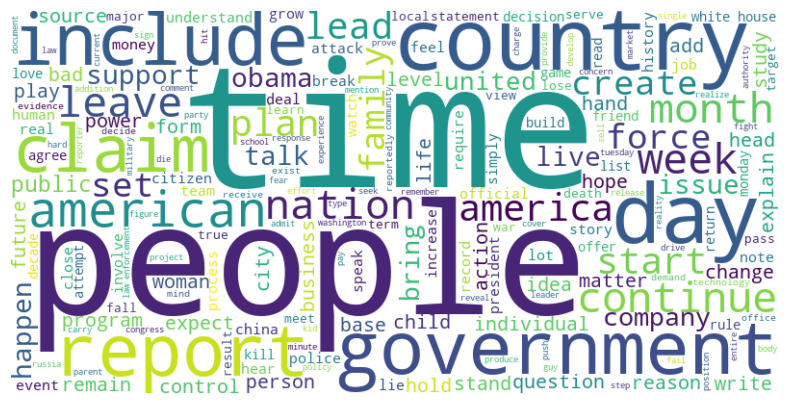

In [10]:
text_without_stopwords_str = ' '.join(text_without_stopwords)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_without_stopwords_str)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


C:\Users\Wang Haotian\AppData\Local\Temp\ipykernel_18472\3500541449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordcounts_df_top100['log_rank'] = wordcounts_df_top100['rank'].apply(lambda x: np.log(x))
C:\Users\Wang Haotian\AppData\Local\Temp\ipykernel_18472\3500541449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wordcounts_df_top100['log_count'] = wordcounts_df_top100['count'].apply(lambda x: np.log(x))


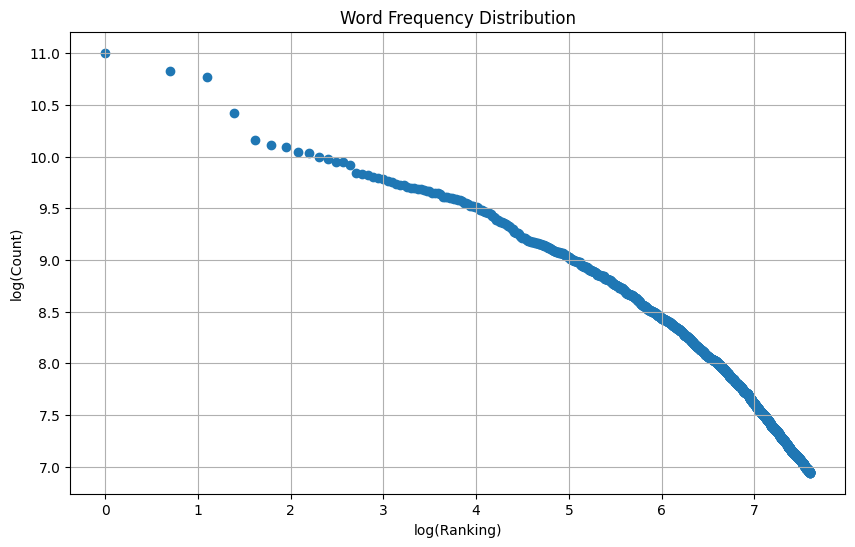

In [11]:
wordcounts_df_top100 = wordcounts_df.head(2000)
wordcounts_df_top100['log_rank'] = wordcounts_df_top100['rank'].apply(lambda x: np.log(x))
wordcounts_df_top100['log_count'] = wordcounts_df_top100['count'].apply(lambda x: np.log(x))
wordcounts_df_top100

plt.figure(figsize=(10, 6))
plt.scatter(wordcounts_df_top100['log_rank'], wordcounts_df_top100['log_count'])
plt.xlabel('log(Ranking)')
plt.ylabel('log(Count)')
plt.title('Word Frequency Distribution')
plt.grid(True)
plt.show()


In [51]:
sentiWords = pd.read_csv("util/SentiWordNet_3.0.0_modified_nohash.csv")
sentiWords['NetScore'] = sentiWords['PosScore'] - sentiWords['NegScore']
sentiWords = sentiWords.loc[~((sentiWords['NetScore'] == 0))]
sentiWords['SynsetTerms'] = sentiWords['SynsetTerms'].str.split()
sentiWords = sentiWords.explode('SynsetTerms')
sentiWords_map = dict(zip(sentiWords['SynsetTerms'], sentiWords['NetScore']))
# sentiWords_map
sentiWords.shape
len(sentiWords_map)
# 'adductives' in sentiWords['SynsetTerms'][7].split()



38803

In [59]:
def calculate_sentiment(text, sentiWords_map):
    words = text.split()
    total_sentiment = 0
    for word in words:
        if word in sentiWords_map:
            score = sentiWords_map[word]
            total_sentiment = total_sentiment+score
    return total_sentiment

# calculate_sentiment('half-length psychodelic_drug',sentiWords_map)

text_without_stopwords_sentiments = text_without_stopwords.apply(lambda x: calculate_sentiment(x, sentiWords_map))
text_without_stopwords_sentiments

0         2.125
1         0.750
2         7.306
3         8.500
4         2.500
          ...  
48849    11.000
48850    10.375
48851    10.375
48852    -4.500
48853     0.625
Name: 1, Length: 48854, dtype: float64

In [69]:
# text_without_stopwords_sentiments.sort_values()
# text_without_stopwords_sentiments.sort_values(ascending=False)
text_label_sentiments = pd.concat([input.iloc[:,0], text_without_stopwords_sentiments], axis=1)
text_label_sentiments.columns = ['label', 'sentiment_score']
text_label_sentiments

,label,sentiment_score
0,1,2.125
1,1,0.750
2,1,7.306
3,1,8.500
4,1,2.500
...,...,...
48849,4,11.000
48850,4,10.375
48851,4,10.375
48852,4,-4.500


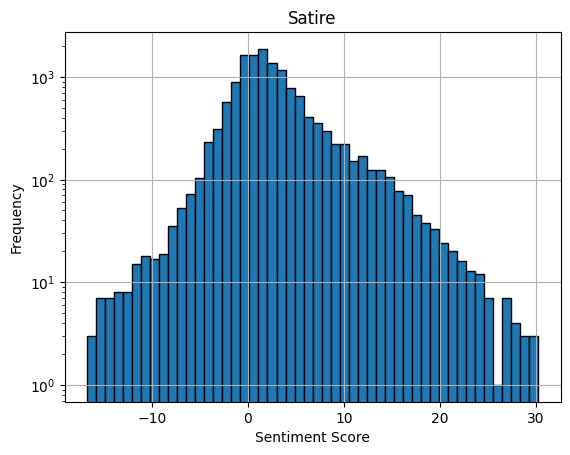

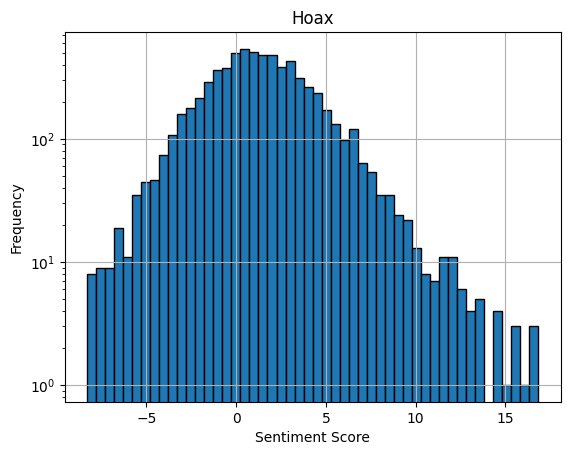

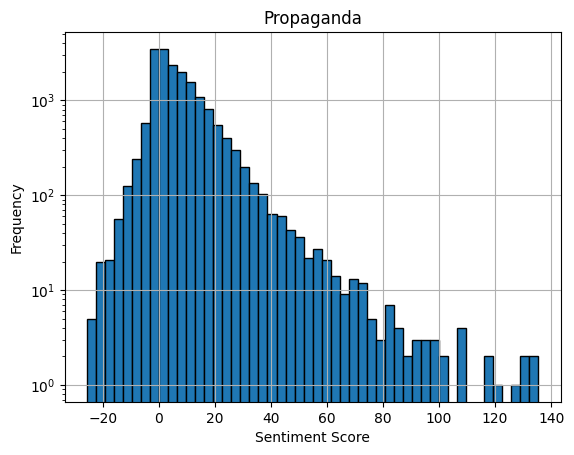

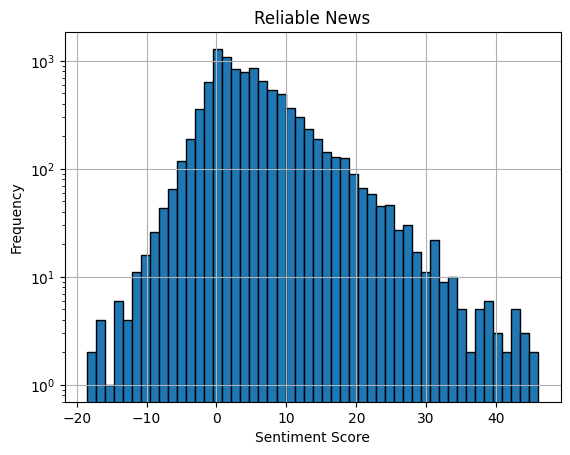

Satire | Hoax | Propaganda | Reliable News
2.7211373066229414 | 1.3693091592025426 | 7.570616918767508 | 5.258226867167919 
1.75 | 1.125 | 4.5 | 3.875 


In [88]:
def plot_log_hist(series, title='Distribution'):
    plt.hist(series, bins=50, edgecolor='black') # density=True/False
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.title(title)
    plt.grid(True)
    plt.show()

def trim(series):
    indices_to_remove = series.nsmallest(10).index.union(series.nlargest(10).index)
    indices_to_remove = series.nsmallest(10).index.union(series.nlargest(10).index)
    filtered_series = series.drop(indices_to_remove)
    return filtered_series

text_label_sentiments_1 = trim(text_label_sentiments[text_label_sentiments['label']==1]['sentiment_score'])
text_label_sentiments_2 = trim(text_label_sentiments[text_label_sentiments['label']==2]['sentiment_score'])
text_label_sentiments_3 = trim(text_label_sentiments[text_label_sentiments['label']==3]['sentiment_score'])
text_label_sentiments_4 = trim(text_label_sentiments[text_label_sentiments['label']==4]['sentiment_score'])
plot_log_hist(text_label_sentiments_1, 'Satire')
plot_log_hist(text_label_sentiments_2, 'Hoax')
plot_log_hist(text_label_sentiments_3, 'Propaganda')
plot_log_hist(text_label_sentiments_4, 'Reliable News')
print('Satire | Hoax | Propaganda | Reliable News')
print(f'{text_label_sentiments_1.mean()} | {text_label_sentiments_2.mean()} | {text_label_sentiments_3.mean()} | {text_label_sentiments_4.mean()} ')
print(f'{text_label_sentiments_1.median()} | {text_label_sentiments_2.median()} | {text_label_sentiments_3.median()} | {text_label_sentiments_4.median()} ')

# Labels: 1-"Satire", 2-"Hoax", 3-"Propaganda", 4-"Reliable News"


